### Fed-Watch BTC Price Prediction
Requirements:Conda, pandas, numpy, sckikitlearn, matplotlib, statsmodels

conda create --name fed_research

conda activate fed_research

conda install pandas numpy scikit-learn matplotlib statsmodels




In [56]:
### Imports
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import re
import math




In [57]:
# Load data
df = pd.read_csv('FED_DATA/FedMeetingHistory_20240310.csv')  
df
new_header = df.iloc[0]
df = df[1:]
header_vals = []
for i in new_header:
    header_vals.append(i)
list = header_vals[:-1]
df

,Unnamed: 0,History for 20 Mar 2024 Fed meeting,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 574,Unnamed: 575,Unnamed: 576,Unnamed: 577,Unnamed: 578,Unnamed: 579,Unnamed: 580,Unnamed: 581,Unnamed: 582,History for 30 Apr 2025 Fed meetingHistory for 18 Jun 2025 Fed meetingHistory for 30 Jul 2025 Fed meetingHistory for 24 Sep 2025 Fed meeting
1,3/10/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/13/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/14/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/15/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3/16/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,3/4/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
249,3/5/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
250,3/6/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
251,3/7/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [58]:

def parse_numbers(string):
    match = re.match(r'\((\d+)-(\d+)\)', string)
    if match:
        return tuple(map(int, match.groups()))
    else:
        return "Date"
    
parsed_header_vals = [parse_numbers(val) for val in list]
parsed_header_vals.append("NaVals")
parsed_header_vals
df.columns = parsed_header_vals
df.set_index('Date', inplace=True)
df = df.drop('NaVals', axis=1)
df['WAE'] = None 
df

,"(0, 25)","(25, 50)","(50, 75)","(75, 100)","(100, 125)","(125, 150)","(150, 175)","(175, 200)","(200, 225)","(225, 250)",...,"(1450, 1475)","(1475, 1500)","(1500, 1525)","(1525, 1550)","(1550, 1575)","(1575, 1600)","(1600, 1625)","(1625, 1650)","(1650, 1675)",WAE
Date,,,,,,,,,,,,,,,,,,,,,
3/10/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3/13/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3/14/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3/15/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3/16/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/4/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
3/5/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
3/6/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None


In [59]:
def midpoint(interval):
    start, end = interval
    return (start + end) / 2

df.columns = [midpoint(col) if isinstance(col, tuple) and col not in ['Date', 'WAE'] else col for col in df.columns]
df
#df.fillna(0, inplace=True)



,12.5,37.5,62.5,87.5,112.5,137.5,162.5,187.5,212.5,237.5,...,1462.5,1487.5,1512.5,1537.5,1562.5,1587.5,1612.5,1637.5,1662.5,WAE
Date,,,,,,,,,,,,,,,,,,,,,
3/10/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3/13/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3/14/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3/15/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3/16/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/4/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
3/5/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
3/6/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None


In [60]:
df = df.apply(pd.to_numeric, errors='coerce')
df['WAE'] = (df.iloc[:, :-1] * df.columns[:-1].astype(float)).sum(axis=1)
df['WAE_Percentage_Change'] = df['WAE'].pct_change()
df

,12.5,37.5,62.5,87.5,112.5,137.5,162.5,187.5,212.5,237.5,...,1487.5,1512.5,1537.5,1562.5,1587.5,1612.5,1637.5,1662.5,WAE,WAE_Percentage_Change
Date,,,,,,,,,,,,,,,,,,,,,
3/10/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460.767775,NaN
3/13/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378.404700,-0.178752
3/14/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,401.012000,0.059744
3/15/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375.905138,-0.062609
3/16/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.595175,0.065682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/4/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4369.156675,0.011889
3/5/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4338.380475,-0.007044
3/6/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4342.737775,0.001004


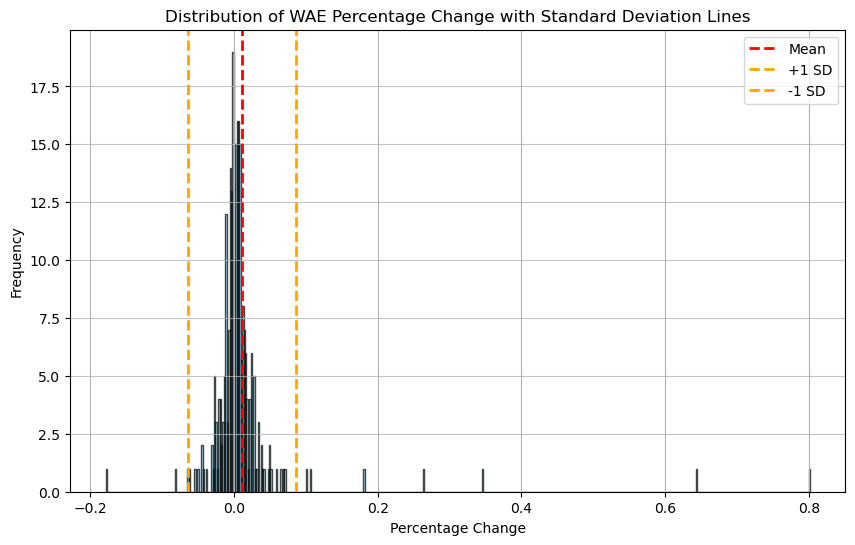

In [61]:
plt.figure(figsize=(10, 6))
df['WAE_Percentage_Change'].hist(bins=500, color='skyblue', edgecolor='black', alpha=0.7)

std_dev = df['WAE_Percentage_Change'].std()

plt.axvline(df['WAE_Percentage_Change'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df['WAE_Percentage_Change'].mean() + std_dev, color='orange', linestyle='dashed', linewidth=2, label='+1 SD')
plt.axvline(df['WAE_Percentage_Change'].mean() - std_dev, color='orange', linestyle='dashed', linewidth=2, label='-1 SD')

plt.title('Distribution of WAE Percentage Change with Standard Deviation Lines')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

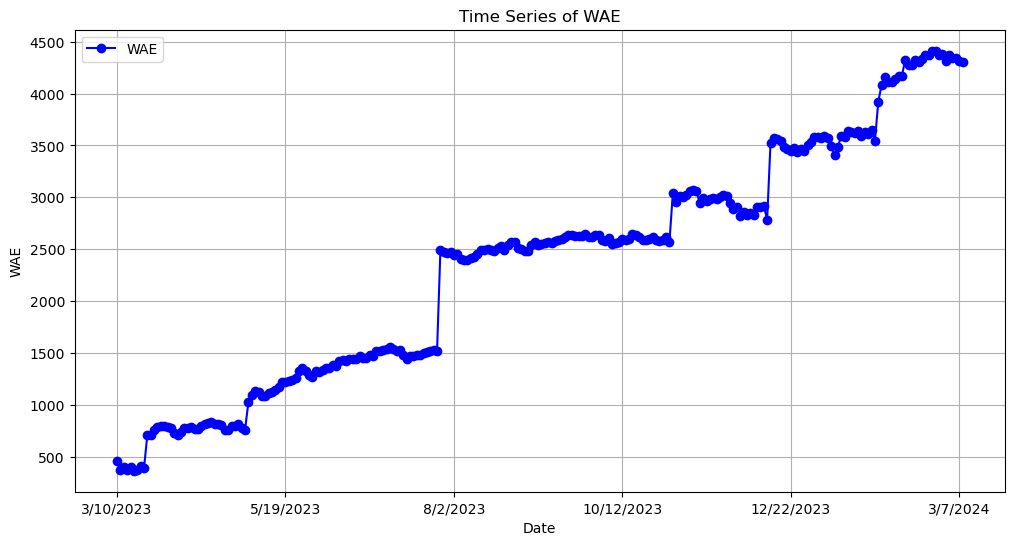

In [62]:
plt.figure(figsize=(12, 6))
df['WAE'].plot(label='WAE', marker='o', linestyle='-', color='blue')

plt.title('Time Series of WAE')
plt.xlabel('Date')
plt.ylabel('WAE')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
# Save Modifed DataFrame as CSV
df.to_csv('fed_data_wae.csv')

In [64]:
df

,12.5,37.5,62.5,87.5,112.5,137.5,162.5,187.5,212.5,237.5,...,1487.5,1512.5,1537.5,1562.5,1587.5,1612.5,1637.5,1662.5,WAE,WAE_Percentage_Change
Date,,,,,,,,,,,,,,,,,,,,,
3/10/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460.767775,NaN
3/13/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378.404700,-0.178752
3/14/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,401.012000,0.059744
3/15/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375.905138,-0.062609
3/16/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.595175,0.065682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/4/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4369.156675,0.011889
3/5/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4338.380475,-0.007044
3/6/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4342.737775,0.001004


In [65]:
# Find Log % change of WAE values
wae_df = df['WAE']
wae_df = pd.DataFrame(wae_df)
wae_df['log_pct_change_wae'] = wae_df['WAE'].pct_change().apply(lambda x: np.log(1 + x))
wae_df


,WAE,log_pct_change_wae
Date,,
3/10/2023,460.767775,NaN
3/13/2023,378.404700,-0.196930
3/14/2023,401.012000,0.058027
3/15/2023,375.905138,-0.064655
3/16/2023,400.595175,0.063615
...,...,...
3/4/2024,4369.156675,0.011819
3/5/2024,4338.380475,-0.007069
3/6/2024,4342.737775,0.001004


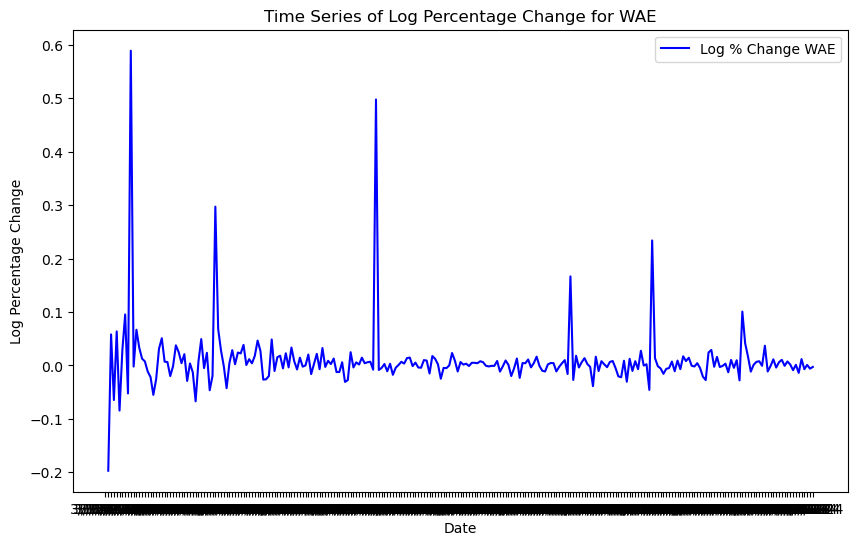

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(wae_df.index, wae_df['log_pct_change_wae'], label='Log % Change WAE', color='blue')
plt.title('Time Series of Log Percentage Change for WAE')
plt.xlabel('Date')
plt.ylabel('Log Percentage Change')
plt.legend()
plt.show()

In [67]:
btc_df = pd.read_csv('PRICE_DATA/COINBASE_BTCUSD_1D_WeeklyVWAP.csv')
btc_df


,time,open,high,low,close,VWAP,Upper Band #1,Lower Band #1,Volume
0,1517097600,11319.00,11697.24,11234.38,11536.00,11035.698313,11270.606580,10800.790045,13684.869060
1,1517184000,11536.00,11570.00,10840.00,11123.01,11177.670000,11177.670122,11177.669878,11162.535960
2,1517270400,11123.01,11150.00,9711.11,9995.00,10542.434851,10946.534627,10138.335075,27583.837970
3,1517356800,9995.00,10299.95,9601.02,10099.99,10360.738660,10777.934697,9943.542622,19533.030210
4,1517443200,10099.99,10166.25,8400.00,9014.23,9898.928324,10555.409360,9242.447287,38152.390460
...,...,...,...,...,...,...,...,...,...
2231,1709856000,66938.21,70199.00,66157.09,68289.16,65856.776964,67327.938294,64385.615633,33749.527975
2232,1709942400,68289.16,68700.41,68047.62,68480.00,65968.465509,67498.901156,64438.029862,9005.509922
2233,1710028800,68480.01,70000.00,68221.13,69032.12,66142.334006,67792.507733,64492.160279,12163.057134
2234,1710115200,69032.80,72943.98,67112.21,72110.98,70722.390000,70722.390000,70722.390000,32332.725832


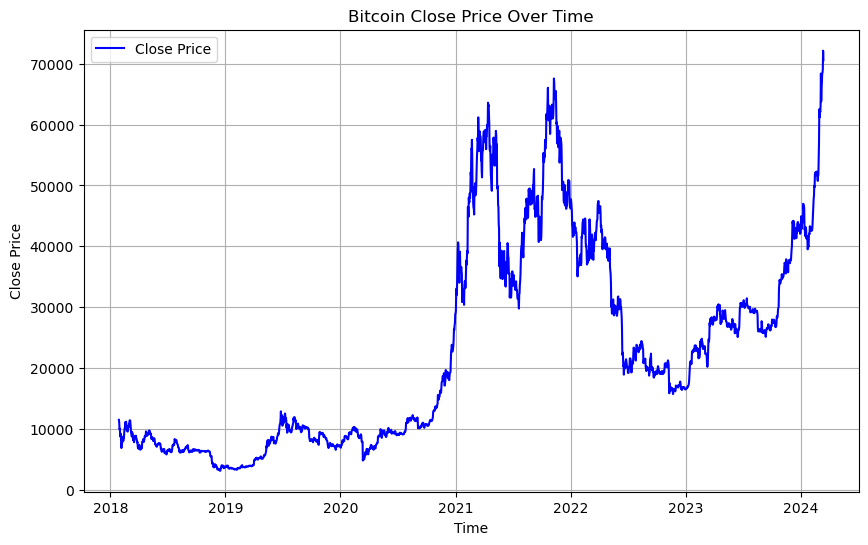

In [68]:
btc_df['time'] = pd.to_datetime(btc_df['time'], unit='s')

# Plotting the 'close' column over time
plt.figure(figsize=(10, 6))
plt.plot(btc_df['time'], btc_df['close'], label='Close Price', color='blue')
plt.title('Bitcoin Close Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

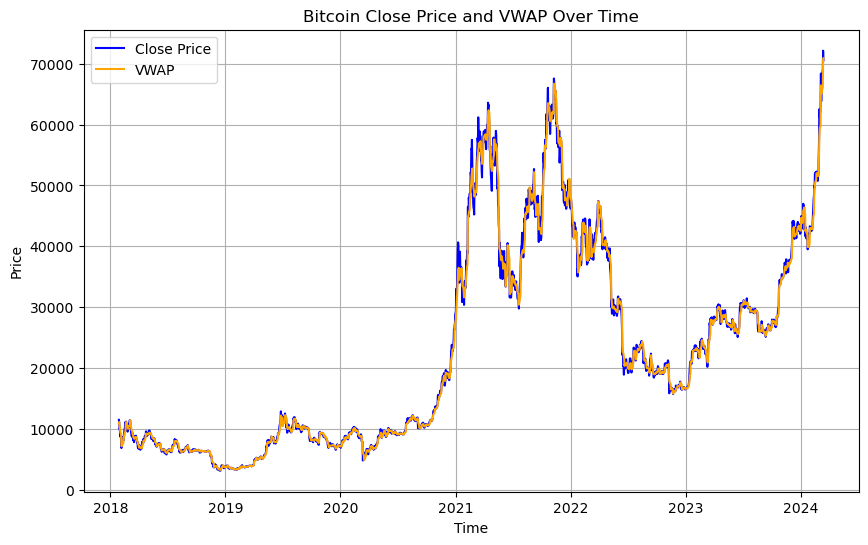

In [69]:
btc_df['time'] = pd.to_datetime(btc_df['time'], unit='s')

# Plotting the 'close' and 'VWAP' columns over time
plt.figure(figsize=(10, 6))
plt.plot(btc_df['time'], btc_df['close'], label='Close Price', color='blue')
plt.plot(btc_df['time'], btc_df['VWAP'], label='VWAP', color='orange')
plt.title('Bitcoin Close Price and VWAP Over Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

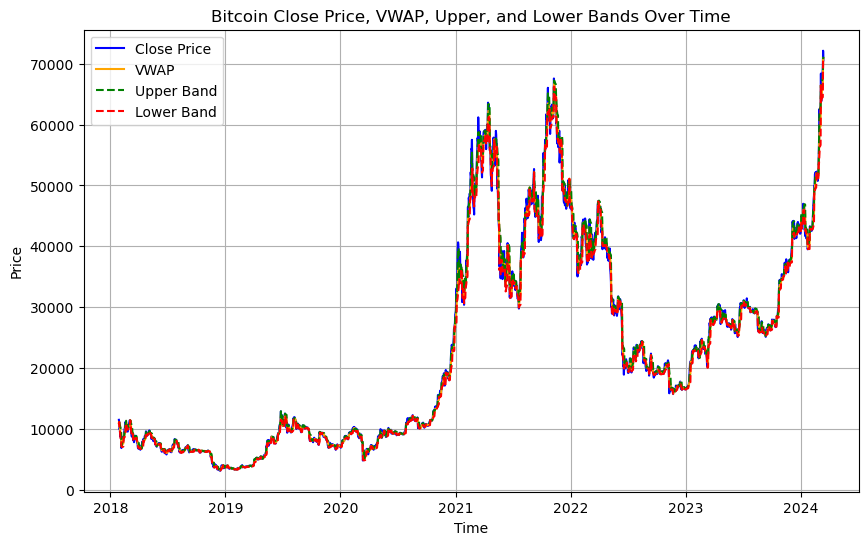

In [70]:
# Plotting the 'close', 'VWAP', Upper Band, and Lower Band columns over time
plt.figure(figsize=(10, 6))
plt.plot(btc_df['time'], btc_df['close'], label='Close Price', color='blue')
plt.plot(btc_df['time'], btc_df['VWAP'], label='VWAP', color='orange')
plt.plot(btc_df['time'], btc_df['Upper Band #1'], label='Upper Band', color='green', linestyle='dashed')
plt.plot(btc_df['time'], btc_df['Lower Band #1'], label='Lower Band', color='red', linestyle='dashed')

plt.title('Bitcoin Close Price, VWAP, Upper, and Lower Bands Over Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
# Calculate log returns for 'close' and 'VWAP'
btc_df['Close_Log_Return'] = btc_df['close'].pct_change().apply(lambda x: 0 if pd.isna(x) else np.log(1 + x))
btc_df['VWAP_Log_Return'] = btc_df['VWAP'].pct_change().apply(lambda x: 0 if pd.isna(x) else np.log(1 + x))

# Create a new DataFrame with log returns
log_returns_df = btc_df[['time', 'Close_Log_Return', 'VWAP_Log_Return']].copy()

# Display the new DataFrame
print(log_returns_df.head())

        time  Close_Log_Return  VWAP_Log_Return
0 2018-01-28          0.000000         0.000000
1 2018-01-29         -0.036457         0.012783
2 2018-01-30         -0.106931        -0.058510
3 2018-01-31          0.010449        -0.017385
4 2018-02-01         -0.113730        -0.045597


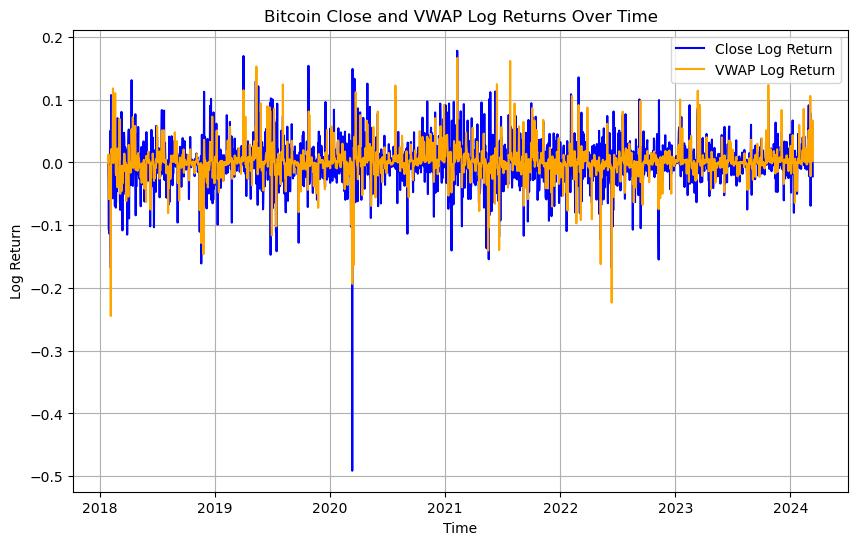

In [72]:
# Plotting the log returns of 'close' and 'VWAP' columns over time
plt.figure(figsize=(10, 6))
plt.plot(log_returns_df['time'], log_returns_df['Close_Log_Return'], label='Close Log Return', color='blue')
plt.plot(log_returns_df['time'], log_returns_df['VWAP_Log_Return'], label='VWAP Log Return', color='orange')

plt.title('Bitcoin Close and VWAP Log Returns Over Time')
plt.xlabel('Time')
plt.ylabel('Log Return')
plt.legend()
plt.grid(True)
plt.show()


                               SARIMAX Results                                
Dep. Variable:       Close_Log_Return   No. Observations:                 2236
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4194.658
Date:                Tue, 12 Mar 2024   AIC                          -8383.316
Time:                        12:30:01   BIC                          -8366.181
Sample:                             0   HQIC                         -8377.060
                               - 2236                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0799      0.015     -5.370      0.000      -0.109      -0.051
ma.L1         -0.9939      0.002   -444.736      0.000      -0.998      -0.989
sigma2         0.0014   1.37e-05    100.246      0.0

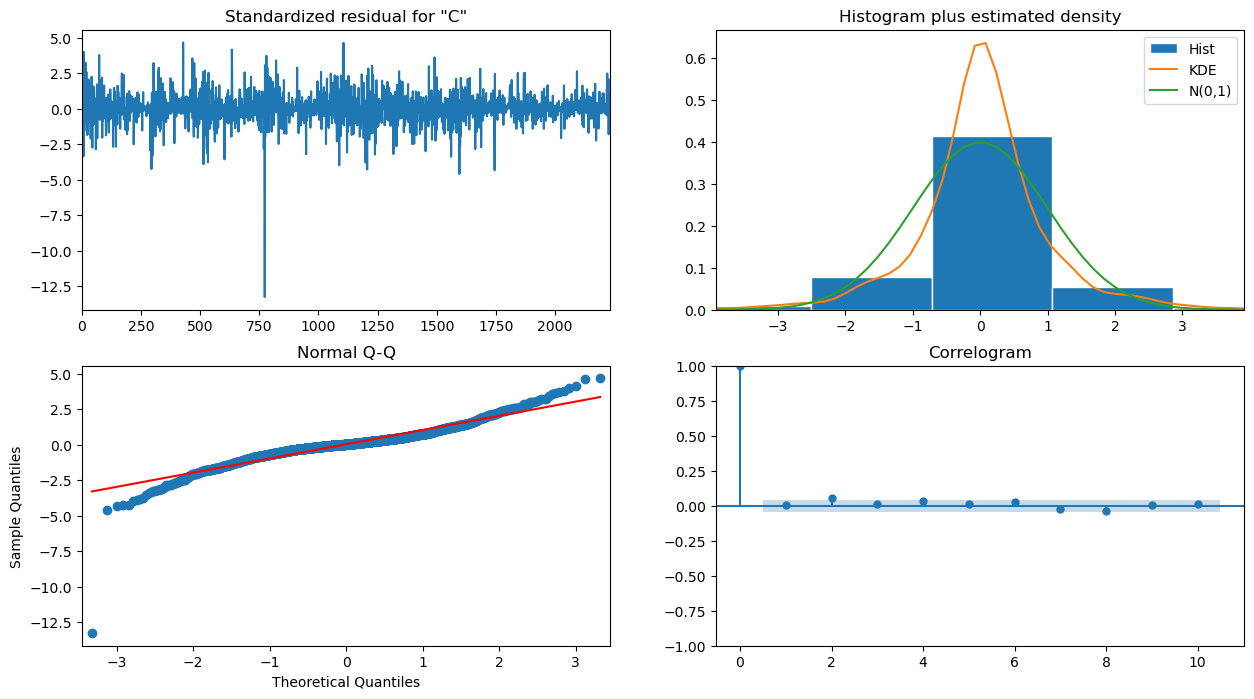

In [73]:
# ARIMA model for 'Close' log returns
p, d, q = 1, 1, 1  # Replace with your chosen values
model_close = ARIMA(log_returns_df['Close_Log_Return'], order=(p, d, q))
results_close = model_close.fit()
print(results_close.summary())
results_close.plot_diagnostics(figsize=(15, 8))
plt.show()

                               SARIMAX Results                                
Dep. Variable:        VWAP_Log_Return   No. Observations:                 2236
Model:                 ARIMA(1, 1, 1)   Log Likelihood                5167.277
Date:                Tue, 12 Mar 2024   AIC                         -10328.554
Time:                        12:30:02   BIC                         -10311.418
Sample:                             0   HQIC                        -10322.298
                               - 2236                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2195      0.017     13.007      0.000       0.186       0.253
ma.L1         -0.9896      0.003   -345.076      0.000      -0.995      -0.984
sigma2         0.0006   5.59e-06    102.598      0.0

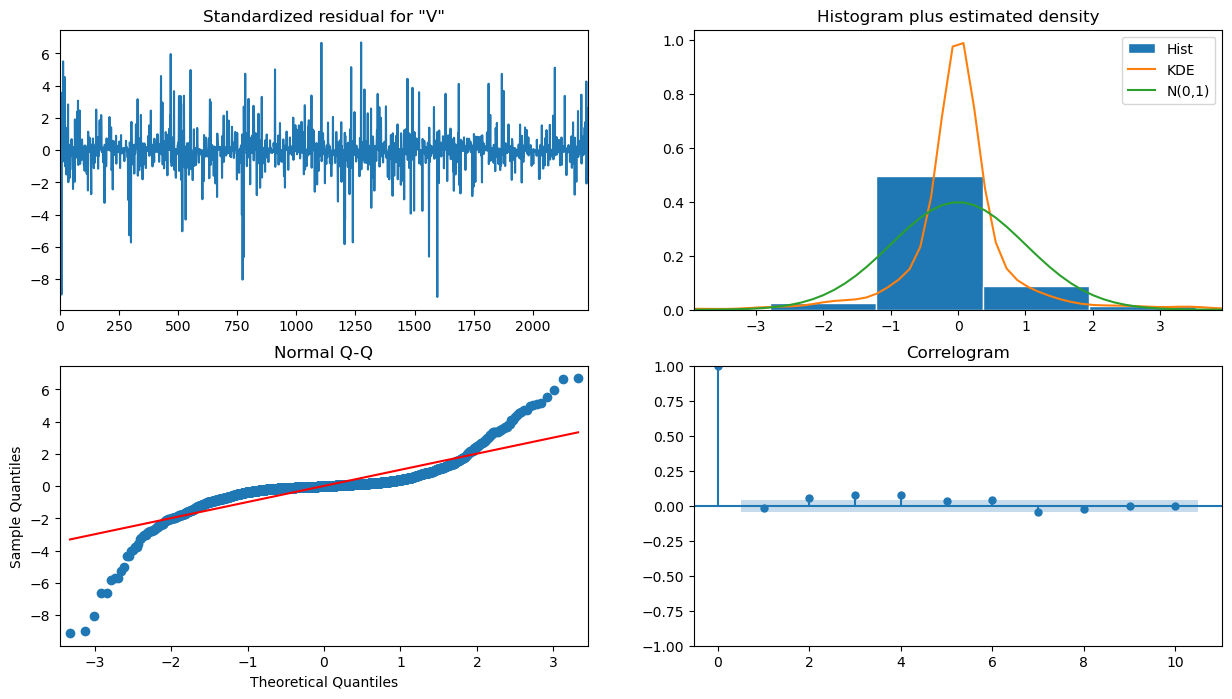

In [74]:
model_vwap = ARIMA(log_returns_df['VWAP_Log_Return'], order=(p, d, q))
results_vwap = model_vwap.fit()
print(results_vwap.summary())
results_vwap.plot_diagnostics(figsize=(15, 8))
plt.show()

In [75]:
# Forecasting for 'Close' log returns
forecast_steps = 10  # Replace with the number of steps you want to forecast
forecast_close = results_close.get_forecast(steps=forecast_steps)
forecast_mean_close = forecast_close.predicted_mean

# Forecasting for 'VWAP' log returns
forecast_vwap = results_vwap.get_forecast(steps=forecast_steps)
forecast_mean_vwap = forecast_vwap.predicted_mean

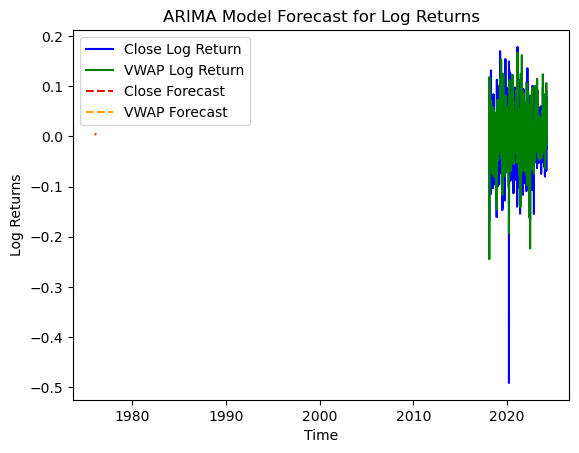

In [76]:
# Plot original log returns, fitted values, and forecast for 'Close' and 'VWAP'
plt.plot(log_returns_df['time'], log_returns_df['Close_Log_Return'], label='Close Log Return', color='blue')
plt.plot(log_returns_df['time'], log_returns_df['VWAP_Log_Return'], label='VWAP Log Return', color='green')
plt.plot(forecast_mean_close.index, forecast_mean_close, color='red', linestyle='--', label='Close Forecast')
plt.plot(forecast_mean_vwap.index, forecast_mean_vwap, color='orange', linestyle='--', label='VWAP Forecast')
plt.title('ARIMA Model Forecast for Log Returns')
plt.xlabel('Time')
plt.ylabel('Log Returns')
plt.legend()
plt.show()

In [77]:
log_returns_df['Date'] = pd.to_datetime(log_returns_df['time'], unit='s')
log_returns_df = log_returns_df.drop(columns=['time'])
log_returns_df = log_returns_df.set_index('Date')

In [78]:
#wae_df.index
log_returns_df.index

DatetimeIndex(['2018-01-28', '2018-01-29', '2018-01-30', '2018-01-31',
               '2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04',
               '2018-02-05', '2018-02-06',
               ...
               '2024-03-03', '2024-03-04', '2024-03-05', '2024-03-06',
               '2024-03-07', '2024-03-08', '2024-03-09', '2024-03-10',
               '2024-03-11', '2024-03-12'],
              dtype='datetime64[ns]', name='Date', length=2236, freq=None)

In [80]:
merged_df = pd.merge(log_returns_df, wae_df[['Date', 'log_pct_change_wae']], on='Date', how='inner')
merged_df

KeyError: "['Date'] not in index"

In [ ]:
wae_df